## Normalize source images and programmatically display images with units and labels

Our source images are taken on different configurations of microscope/objective lens/digitizer. This is the code to normalize the size of all source images in preparation for building a dataset. This also allows us to show the Radiolaria specimens with proper units, regardles the size of the source file. This is important because the images will likely be cropped to train the neural net only on the specimen images, not the specimen and background debris.

GNU Image Manipulation Program (GIMP) is used to take initial measurements and then find proper coefficients through successive approximation.

All code to perform calculations and programmatic manipulation of images is contained in the Python code sections.


Procedure:

Normalize sizes of images: 

  1. Calculate normalization coefficient for Axioskop with 40X objective and AmScope MU300 digitizer
   1. select an image from the first set created with an Axioskop with 40X objective and AmScope MU300 digitizer
   2. Find dimensions of image in pixels
   3. Find correlating calibration slide(image of calibration slide taken on same 40X objective)
   4. Superimpose the two images using GIMP to see if the image is roughly in the size range for Radiolaria 
   5. Take initial measure of distance and rotation
   6. Verify calibration image has no skew by reversing rotation and placing horizontal and vertical guides (make sure calibration slide is perpendicular to x-axis)
   7. Calculate pixels per micrometer by dividing the amount of pixels measured by the correlating measurement of micrometers
   8. Resize the images by opening their file in a terminal and use the /mogrify command, scale the images using the coefficient in step vii
  2. Calculate normalization coefficient for Olympus BH-2 with a 30X objective lens and (Need specifications here) digitizer
   1. select an image from the first set created with an Axioskop with 30X objective and AmScope MU300 digitizer
   2. Find dimensions of image in pixels
   3. Find correlating calibration slide(image of calibration slide taken on same 30X objective)
   4. Superimpose the two images using GIMP to see if the image is roughly in the size range for Radiolaria 
   5. Take initial measure of distance and rotation
   6. Verify calibration image has no skew by reversing rotation and placing horizontal and vertical guides (make sure calibration slide is perpendicular to x-axis)
   7. Calculate pixels per micrometer by dividing the amount of pixels measured by the correlating measurement of micrometers
   8. Resize the images by opening their file in a terminal and use the /mogrify command, scale the images using the coefficient in step vii 
  3. Programmatically load and display images with proper units, grids, titles, and labels

### Let's calibrate our image units

* Let's select an image from the first set created with an Axioskop with 40X objective and AmScope MU300 digitizer:

![astrelkovi.jpg](astrelkovi.jpg "A. Strelkovi")

* The dimensions of this image are 2048x1536 pixels

* Now let's look at the calibration slide for this microscope configuration. (midpoints of minor bars are 10µm apart):

![scalex40.jpg not loading](scalex40.jpg "Calibration bars")

### Do a quick sanity check

* Superimpose the two images to see if we are roughly in the size range for Radiolaria:

![Image not loading](sanity1.jpg "Simple overlay of calibration bars and specimen photograph")

Check! Individual is ~ 100µm

* Take initial measure of distance and rotation:

![Image not loading](anglecorrection.png "Initial measure")

* Verify calibration image has no skew by reversing rotation and placing horizontal and vertical guides:

![Image not loading](perpendicularitytest.png "Corrected for rotation")

Check! Image is orthogonal.



### Calculate pixels per micrometer:

In [1]:
print("1781.5/200 = "+str(1781.5/200))

1781.5/200 = 8.9075



* Now come up with a coeficient to match 10 pixels per micrometer.

In [2]:
print(""+str(10/8.9075))

1.1226494527083917


Testing this value by scaling the calibration slide image shows that our single measurement has introduced an error of about one percent. Successive approximation produces a more precise value of 1.118164063. In the process we have created a reticle grid:

![reticle_grid_Axioskop_40X_rjg.png not found](example_astrelkovi_w_reticle_grid_small.jpg "Axioskop_40X")

Now we can get to work displaying images with proper units for this configuration of microscope, objective lens, and digitizer.

## For the second microscope, an Olympus BH-2 with a 30X objective lens and (Need specifications here) digitizer:

### Let's calibrate our image units

* Let's select an image from the second set:

![Image not loading](A.deflandrei.jpg "A. deflandrei")

* The dimensions of this image are 1024x768 pixels

* Now let's look at the calibration slide for this microscope configuration. (midpoints of minor bars are 10µm apart):

![Image not loading](calibrateLazarus.jpg "Calibration bars")

### Do a quick sanity check

* Superimpose the two images to see if we are roughly in the size range for Radiolaria:

![Image not loading](sanity2.jpg "Simple overlay of calibration bars and specimen photograph")

Check! Individual is ~ 85µm

* Take initial measure of distance and rotation:

![Image not loading](measureminiruler.jpg "Initial measure")

* Verify calibration image has no skew by reversing rotation and placing horizontal and vertical guides:

![Image not loading](correctedimage2.png "Corrected for rotation")

Check! Image is orthogonal.


### Calculate pixels per micrometer:

In [3]:
print("736/250 = "+str(736/250))

736/250 = 2.944



* Now come up with a coeficient to match 10 pixels per micrometer

In [4]:
print(""+str(10/2.944))

3.3967391304347827


And verify results. Check!

![example_ adeflandrei_w_reticle_grid_small.jpg not found](example_ adeflandrei_w_reticle_grid_small.jpg "Closeup")

Now we can get to work displaying images with proper units for this configuration of microscope, objective lens, and digitizer.


* First simply load and plot an image:

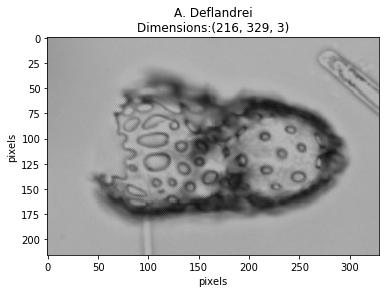

In [5]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread('adeflandrei_cropped.jpg')
plt.title("A. Deflandrei\nDimensions:" + str(image.shape))
plt.xlabel('pixels')
plt.ylabel('pixels')
plt.imshow(image)
plt.show()

Notice that we have pixels as units. Now we can make use of our painstakingly approximated ratios. 

Steps:
1. Parse original filename for microscope-objective-digitizer configuration.
2. Verify resolution match.
3. Plot image with proper units.
4. Plot image of abritrary size with proper units, title, axis labels, etc.


## 1. Original filename ("A. deflandrei 28 1138A-17-2,105 Olympus BH-2 30X dbl.bmp") indicates  Olympus BH-2 with a 30X objective lens. 


Load the image and check resolution:

In [6]:
image = mpimg.imread('A. deflandrei 28 1138A-17-2,105 Olympus BH-2 30X dbl.bmp')
print(image.shape)

(768, 1024, 3)


## 2. Resolution is the expected 1024x768 pixels

## 3. Plot image programmatically with proper units

First, plot the larger image with proper units. Let's also add major and minor gridlines to simulate a reticle.

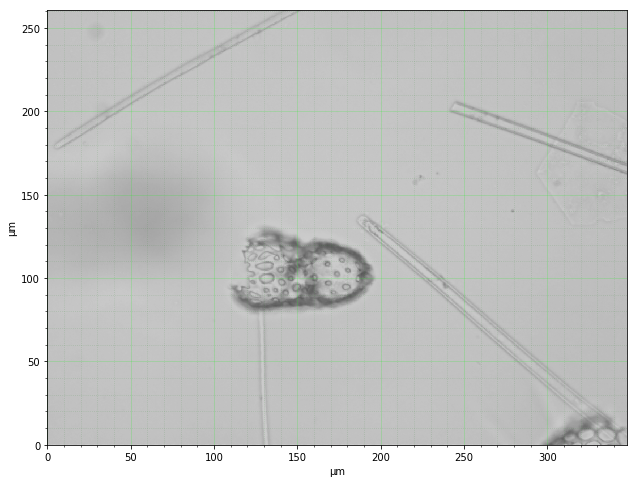

In [7]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread('A. deflandrei 28 1138A-17-2,105 Olympus BH-2 30X dbl.bmp')
olyPPM = 2.944 #Olympus BH-2 30X pixels per micrometer

fig = plt.gcf()
fig_size = plt.rcParams["figure.figsize"]
fig.set_size_inches(fig_size[0]*2, fig_size[1]*2)

plt.xlabel('µm')
plt.ylabel('µm')
xDim = image.shape[1]/olyPPM
yDim = image.shape[0]/olyPPM
plt.imshow(image, extent=[0,xDim,0,yDim],alpha=0.7)
plt.axis([0,xDim,0,yDim])
plt.grid(color='#00FF00',alpha=.2)
plt.minorticks_on()
plt.grid(b=True, which='minor', color='g', linestyle=':', alpha=0.15)
plt.show()

## 4. Plot image of abritrary size with proper units, title, axis labels, etc.

Let's load an image cropped to display primarily the specimen of interest. This is an image of arbitrary dimensions.

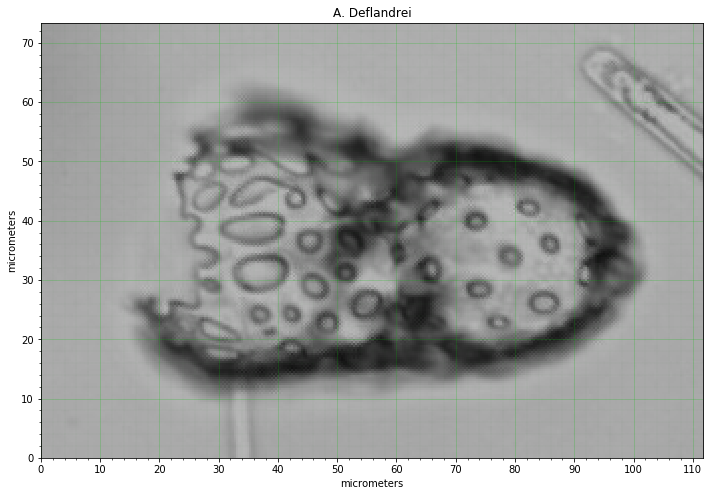

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.ticker as ticker

image = mpimg.imread('adeflandrei_cropped.jpg')

plt.xlabel('micrometers')
plt.ylabel('micrometers')

olyPPM = 2.944 #Olympus BH-2 30X pixels per micrometer
xDim = image.shape[1]/olyPPM
yDim = image.shape[0]/olyPPM
plt.imshow(image, extent=[0,xDim,0,yDim], alpha=1)

#make this small image easier to see
fig = plt.gcf()
fig_size = plt.rcParams["figure.figsize"]
fig.set_size_inches(fig_size[0]*2, fig_size[1]*2)

#make sure ticks display with proper interval
plt.xticks(np.arange(0, xDim, 10))
plt.grid(color='#00C000',alpha=.2, linestyle='-', linewidth=1)

#plt.grid(color='g', linestyle=':', linewidth=.3)
plt.minorticks_on()
plt.grid(b=True, which='minor', color='g', linewidth=.3, linestyle=':', alpha=0.2)
plt.title("A. Deflandrei")
plt.show()



Yes, dimensions in micrometers are properly calculated and displayed, regardless of cropping.